In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from skimage.transform import resize
import torchvision.transforms as transforms
from skimage.io import imread, imshow
from skimage.transform import rescale, resize

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df_r = pd.read_csv(r"/content/drive/MyDrive/Datasets/labels.csv")
X = df_r['text_corrected']
labels = df_r['overall_sentiment']

df_r

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [4]:

df = pd.concat([X,labels],axis=1)
#finding the NULL and removing them
X = pd.DataFrame(X)
nulls = np.where(df.isnull())
print(nulls)
for i in nulls[0]:
    df.drop([i], axis=0, inplace=True)
df.shape

(array([ 119, 4799, 6781, 6784, 6786]), array([0, 0, 0, 0, 0]))


(6987, 2)

## LABELS

In [5]:
labels = df['overall_sentiment']
l = []
# making the labels dataset have 3 classes only 
for i in labels:
    if(i == 'very_positive' or i == 'positive'):
        l.append(0)
    if(i == 'very_negative' or i == 'negative'):
        l.append(1)
    if(i == 'neutral'):    
        l.append(2)
len(l)

6987

## TOKANIZING AND ASSIGNING INTEGER VALUES TO WORDS

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# COUNT VECTOEIZER
x = df['text_corrected']
X1 = []
X_train, X_test, y_train, y_test = train_test_split(df['text_corrected'], l, test_size=0.2)
vectorizer = CountVectorizer(lowercase=True)
vectorizer.fit(df['text_corrected'])
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train_vec.shape)
print(X_test_vec.shape)
X_train_tensor_t = torch.from_numpy(X_train_vec.todense()).float()
X_test_tensor_t = torch.from_numpy(X_test_vec.todense()).float()
Y_train_tensor = torch.from_numpy(np.array(y_train))
Y_test_tensor = torch.from_numpy(np.array(y_test))
print(len(X_train_tensor_t[0]))

(5589, 12933)
(1398, 12933)
12933


In [7]:
label_tensor = []
for i in range(len(l)):
    l[i] = torch.tensor(l[i], dtype=torch.float32)
    label_tensor.append(l[i])

### IMAGE PART

In [8]:
len(os.listdir())

3

In [9]:
os.chdir("/content/drive/MyDrive/Datasets/images")

In [10]:
df_r = pd.read_csv(r"/content/drive/MyDrive/Datasets/labels.csv")
n = df_r['image_name']
to_delete = [119, 4799, 6781, 6784, 6786]
for d in to_delete:
    del n[d]

In [11]:
from PIL import Image,ImageOps,ImageFile  #library
ImageFile.LOAD_TRUNCATED_IMAGES = True
n

0          image_1.jpg
1         image_2.jpeg
2          image_3.JPG
3          image_4.png
4          image_5.png
             ...      
6987    image_6988.jpg
6988    image_6989.jpg
6989    image_6990.png
6990    image_6991.jpg
6991    image_6992.jpg
Name: image_name, Length: 6987, dtype: object

In [13]:

from skimage import color 
image_tensors= []
transform = transforms.ToTensor()
for i in n:
    print(i)
    image = Image.open(i)
    image = image.resize((256,256))
    gray_image = ImageOps.grayscale(image)
    tensor = torch.tensor(np.array(gray_image).flatten(),dtype=torch.float32)
    image_tensors.append(tensor)

Streaming output truncated to the last 5000 lines.
image_1513.jpg
image_1514.jpg
image_1515.jpg
image_1516.png
image_1517.jpg
image_1518.png
image_1519.jpg
image_1520.png
image_1521.png
image_1522.jpg
image_1523.jpg
image_1524.png
image_1525.jpg
image_1526.jpg
image_1527.jpg
image_1528.jpg
image_1529.jpg
image_1530.jpg
image_1531.jpg
image_1532.png
image_1533.jpg
image_1534.png
image_1535.png
image_1536.png
image_1537.png
image_1538.png
image_1539.jpg
image_1540.jpg
image_1541.jpg
image_1542.jpg
image_1543.jpg
image_1544.png
image_1545.png
image_1546.png
image_1547.jpg
image_1548.jpg
image_1549.png
image_1550.png
image_1551.png
image_1552.png
image_1553.jpg
image_1554.jpg
image_1555.png
image_1556.jpg
image_1557.png
image_1558.jpg
image_1559.jpg
image_1560.jpg
image_1561.jpeg
image_1562.jpg
image_1563.jpg
image_1564.jpg
image_1565.jpg
image_1566.png
image_1567.jpg
image_1568.jpg
image_1569.jpg
image_1570.jpg
image_1571.jpg
image_1572.jpg
image_1573.jpg
image_1574.jpeg
image_1575.jpg
im

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


image_6514.png
image_6515.jpg
image_6516.jpg
image_6517.jpg
image_6518.jpeg
image_6519.jpg
image_6520.png
image_6521.png
image_6522.jpg
image_6523.png
image_6524.png
image_6525.png
image_6526.jpg
image_6527.png
image_6528.png
image_6529.jpg
image_6530.jpg
image_6531.jpg
image_6532.jpg
image_6533.png
image_6534.jpg
image_6535.jpg
image_6536.png
image_6537.jpg
image_6538.png
image_6539.jpeg
image_6540.png
image_6541.png
image_6542.jpg
image_6543.png
image_6544.jpg
image_6545.png
image_6546.png
image_6547.png
image_6548.jpg
image_6549.jpg
image_6550.jpg
image_6551.jpg
image_6552.png
image_6553.jpg
image_6554.jpg
image_6555.jpg
image_6556.jpg
image_6557.jpg
image_6558.jpg
image_6559.png
image_6560.png
image_6561.jpg
image_6562.png
image_6563.jpg
image_6564.png
image_6565.png
image_6566.png
image_6567.jpg
image_6568.jpg
image_6569.jpg
image_6570.jpg
image_6571.jpg
image_6572.png
image_6573.jpg
image_6574.jpg
image_6575.jpg
image_6576.jpg
image_6577.jpg
image_6578.jpg
image_6579.jpg
image_65

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


image_6678.jpg
image_6679.jpg
image_6680.png
image_6681.jpg
image_6682.jpg
image_6683.jpg
image_6684.jpg
image_6685.jpg
image_6686.jpg
image_6687.png
image_6688.jpg
image_6689.jpg
image_6690.png
image_6691.png
image_6692.jpg
image_6693.jpg
image_6694.jpg
image_6695.jpg
image_6696.jpg
image_6697.jpg
image_6698.png
image_6699.jpg
image_6700.png
image_6701.jpg
image_6702.jpg
image_6703.png
image_6704.png
image_6705.png
image_6706.jpg
image_6707.jpg
image_6708.png
image_6709.png
image_6710.jpeg
image_6711.jpeg
image_6712.jpg
image_6713.jpg
image_6714.png
image_6715.png
image_6716.png
image_6717.jpg
image_6718.png
image_6719.png
image_6720.png
image_6721.jpg
image_6722.jpg
image_6723.jpg
image_6724.jpg
image_6725.jpg
image_6726.jpg
image_6727.jpg
image_6728.jpg
image_6729.png
image_6730.jpg
image_6731.jpg
image_6732.jpg
image_6733.jpg
image_6734.jpg
image_6735.png
image_6736.jpg
image_6737.jpeg
image_6738.jpg
image_6739.jpeg
image_6740.jpg
image_6741.jpg
image_6742.jpg
image_6743.png
image_


### STORING PIXELS 

In [14]:
print(len(image_tensors))                   
print(len(l))                                                  

6987
6987


## TEXT SPLIT


In [15]:
# X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Text_tensors, label_tensor , test_size = 0.3)
# X_val_train_t, X_val_test_t, y_val_train_t, y_val_test_t = train_test_split(X_train_t, y_train_t , test_size = 0.2 , random_state = 60)

## IMAGE SPLIT

In [16]:

X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(image_tensors, label_tensor, test_size=0.2)

### SPLITING IMAGE PART

In [17]:
# X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(image_tensors, l , test_size = 0.3 , random_state = 60)
# X_val_train_img, X_val_test_img, y_val_train_img, y_val_test_img = train_test_split(X_train_img, y_train_img , test_size = 0.2 , random_state = 60)

In [18]:
import torch.nn as nn
import torch.optim as optim

In [19]:
class Netty(nn.Module):
    def __init__(self):
        super(Netty,self).__init__()

        #texttt
        self.linearT1 = nn.Linear(12933, 7000)
        self.linearT2 = nn.Linear(7000, 5000)
        self.linearT3 = nn.Linear(5000, 3000)
        self.linearT4 = nn.Linear(3000, 1500)
        self.linearT5 = nn.Linear(1500, 400)

        #image
        self.linearI1 =  nn.Linear(256*256, 7000)
        self.linearI2 =  nn.Linear(7000, 4000)
        self.linearI3 =  nn.Linear(4000, 1000)
        self.linearI4 =  nn.Linear(1000, 500)
        self.linearI5 = nn.Linear(500, 400)

        #comibined
        self.linearC1  = nn.Linear(800, 500)
        self.linearC2  = nn.Linear(500, 350)
        self.linearC3  = nn.Linear(350, 300)
        self.linearC4  = nn.Linear(300, 250)
        self.linearC5  = nn.Linear(250, 100)
        self.linearC6  = nn.Linear(100, 60)

        #Humour
        self.linearH1 = nn.Linear(60,40)
        self.linearH2 = nn.Linear(40,10)
        self.linearH3 = nn.Linear(10,4)
        
        #sarcasm
        self.linearS1 = nn.Linear(60,40)
        self.linearS2 = nn.Linear(40,10)
        self.linearS3 = nn.Linear(10,4)

        #offensive
        self.linearO1 = nn.Linear(60,40)
        self.linearO2 = nn.Linear(40,10)
        self.linearO3 = nn.Linear(10,4)
        
        #Motivational
        self.linearM1 = nn.Linear(60,40)
        self.linearM2 = nn.Linear(40,10)
        self.linearM3 = nn.Linear(10,2)



        
    def forward(self,x,y):
        x=torch.sigmoid(self.linearT1(x))  
        x= torch.sigmoid(self.linearT2(x)) 
        x= torch.sigmoid(self.linearT3(x)) 
        x= torch.sigmoid(self.linearT4(x)) 
        x = self.linearT5(x)
        y = torch.sigmoid(self.linearI1(y))  
        y = torch.sigmoid(self.linearI2(y)) 
        y = torch.sigmoid(self.linearI3(y)) 
        y = torch.sigmoid(self.linearI4(y)) 
        y = self.linearI5(y)
        
        z = torch.cat((x,y))

        z = torch.sigmoid(self.linearC1(z))  
        z = torch.sigmoid(self.linearC2(z)) 
        z = torch.sigmoid(self.linearC3(z)) 
        z = torch.sigmoid(self.linearC4(z))
        z = torch.sigmoid(self.linearC5(z))
        m = self.linearC6(z)

        #humour
        h = torch.sigmoid(self.linearH1(m))
        h = torch.sigmoid(self.linearH2(h))
        humour = self.linearH3(h)

        
        #sarcasm
        s = torch.sigmoid(self.linearS1(m))
        s = torch.sigmoid(self.linearS2(s))
        sarcasm = self.linearS3(s)

        #offensive
        o = torch.sigmoid(self.linearO1(m))
        o = torch.sigmoid(self.linearO2(o))
        offensive = self.linearO3(o)

        #motivational
        mot = torch.sigmoid(self.linearM1(m))
        mot = torch.sigmoid(self.linearM2(mot))
        mootivational = self.linearM3(mot)



        return humour,sarcasm,offensive,mootivational
    

In [20]:
model = Netty()

In [21]:
# X_train_tensor_t 
# print(X_trainTensor_img[0])
# print(type(X_train_tensor_t[0]))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [22]:
!pip install torchviz
#self.add_module('scale_kernel', kernel_weight) self.scale_kernel = torch.tensor(np.tile(kernel, (3, 1, 1, 1))).float()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=264dfcc7f8301a096df8e0bcb051e5c741cb5184ac1abc67c692913b17e380c4
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [23]:
print(len(X_train_img))
print(len(X_train_tensor_t))

5589
5589


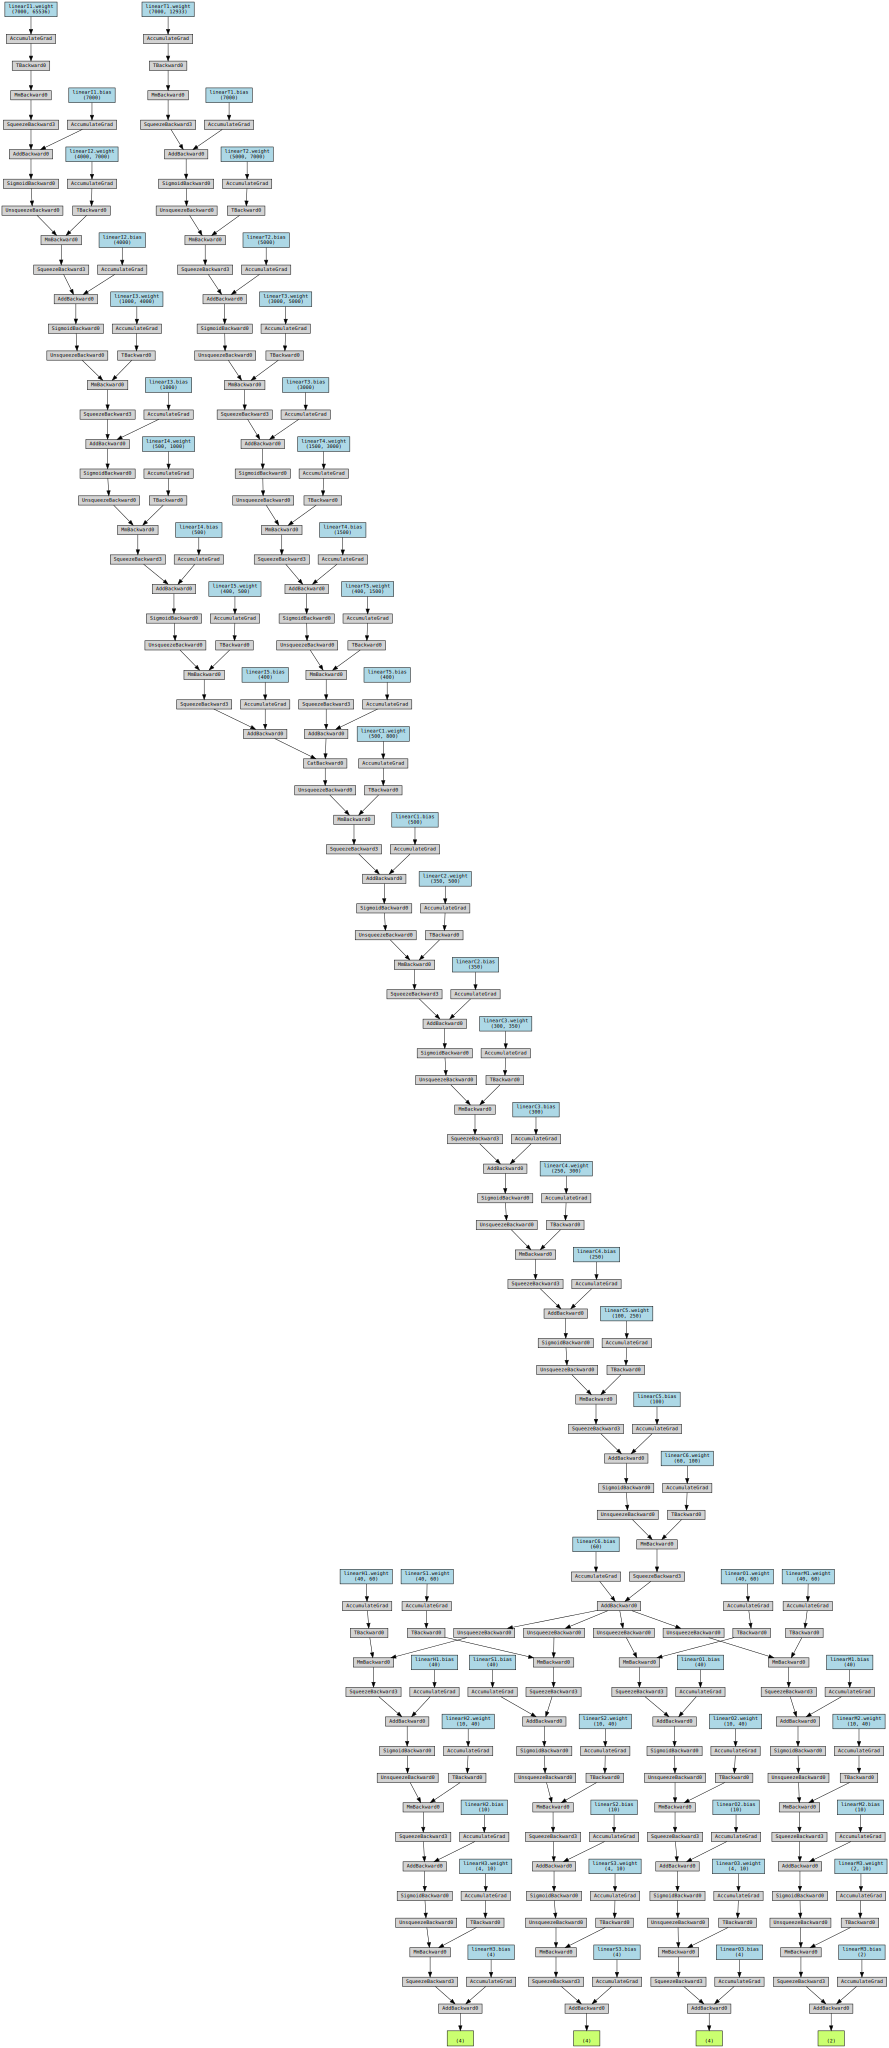

In [24]:
from torchviz import make_dot
make_dot(model(X_train_tensor_t[0],X_train_img[0]), params=dict(model.named_parameters()))

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
a = df_r.humour.map({ 'hilarious':1, 'not_funny':2, 'very_funny':3, 'funny':4})
b = df_r.sarcasm.map({ 'general':1, 'not_sarcastic':2, 'twisted_meaning':3, 'sarcastic':4})
c = df_r.offensive.map({ 'offensive':1, 'not_offensive':2, 'very_offensive':3, 'slight':4})
d = df_r.motivational.map({ 'motivational':1, 'not_motivational':2})


to_delete = [119, 4799, 6781, 6784, 6786]
for i in to_delete:
    del a[i]
    del b[i]
    del c[i]
    del d[i]

tns1 = []
tns2 = []
tns3 = []
tns4 = []

for i in a:
    x1 = torch.tensor(i,dtype=torch.float32)
    tns1.append(x1)
for i in b:
    x1 = torch.tensor(i,dtype=torch.float32)
    tns2.append(x1)
for i in c:
    x1 = torch.tensor(i,dtype=torch.float32)
    tns3.append(x1)
for i in d:
    x1 = torch.tensor(i,dtype=torch.float32)
    tns4.append(x1)

X_train_img, X_test_img, y_train_img_h, y_test_img_h = train_test_split(image_tensors, tns1, test_size=0.2)
X_train_img, X_test_img, y_train_img_s, y_test_img_s = train_test_split(image_tensors, tns2, test_size=0.2)
X_train_img, X_test_img, y_train_img_o, y_test_img_o = train_test_split(image_tensors, tns3, test_size=0.2)
X_train_img, X_test_img, y_train_img_m, y_test_img_m = train_test_split(image_tensors, tns4, test_size=0.2)


In [28]:
for epoch in range(5):  # loop over the dataset multiple times
    correct   = 0  
    totalLoss = 0

    # training
    for i in range(0,len(X_train_img)):
        image = X_train_img[i].cuda()        # image tensor
        text  = X_train_tensor_t[i].cuda()    #text tensor
        label1 = y_train_img_h[i].type(torch.long).cuda()                #label tensor
        label2 = y_train_img_s[i].type(torch.long).cuda()                #label tensor
        label3 = y_train_img_o[i].type(torch.long).cuda()                #label tensor
        label4 = y_train_img_m[i].type(torch.long).cuda()                #label tensor
        

        hpred,spred,opred,mpred  = model(text, image)
        hloss  = criterion(hpred, label1)  #calculate loss
        sloss  = criterion(spred, label2)  #calculate loss
        oloss  = criterion(opred, label3)  #calculate loss
        mloss  = criterion(mpred, label4)  #calculate loss

        optimizer.zero_grad()

        hloss.backward()
        optimizer.step() 
        sloss.backward()
        optimizer.step() 
        oloss.backward()
        optimizer.step() 
        mloss.backward()
        optimizer.step()
        
        
    predhum = []
    predsar = []
    predoff = []
    predmot = []

    Ytesth = []
    Ytests = []
    Ytesto = []
    Ytestm = []

     #testing   
    for i in range(0,len(X_test_img)):
        image = X_test_img[i].cuda()     # image tensor
        text = X_test_tensor_t[i].cuda()        #text tensor
        label1 = y_test_img_h[i].type(torch.long).cuda()                #label tensor
        label2 = y_test_img_s[i].type(torch.long).cuda()                #label tensor
        label3 = y_test_img_o[i].type(torch.long).cuda()                #label tensor
        label4 = y_test_img_m[i].type(torch.long).cuda()                #label tensor
        hpred,spred,opred,mpred  = model(text, image)

        predhum.append(int(torch.argmax(hpred)))              
        Ytesth.append(label1.cpu().detach().numpy())     # changing the tensor back to normal array

        predsar.append(int(torch.argmax(spred)))              
        Ytests.append(label2.cpu().detach().numpy())     # changing the tensor back to normal array

        predoff.append(int(torch.argmax(opred)))              
        Ytesto.append(label3.cpu().detach().numpy())     # changing the tensor back to normal array

        predmot.append(int(torch.argmax(mpred)))              
        Ytestm.append(label4.cpu().detach().numpy())     # changing the tensor back to normal array

    print("epoch",epoch+1)
    # print('loss :',totLoss/len(X_test_img))
    print("Accuracy: ",accuracy_score(Ytestm,predhum)*100)
    print('F1 score :',f1_score(Ytestm,predhum,average = 'macro')*100)


    print("epoch",epoch+1)
    # print('loss :',totLoss/len(X_test_img))
    print("Accuracy: ",accuracy_score(Ytests,predsar)*100)
    print('F1 score :',f1_score(Ytests,predsar,average = 'macro')*100)

    print("epoch",epoch+1)
    # print('loss :',totLoss/len(X_test_img))
    print("Accuracy: ",accuracy_score(Ytesto,predoff)*100)
    print('F1 score :',f1_score(Ytesto,predoff,average = 'macro')*100)

    print("epoch",epoch+1)
    # print('loss :',totLoss/len(X_test_img))
    print("Accuracy: ",accuracy_score(Ytestm,predmot)*100)
    print('F1 score :',f1_score(Ytestm,predmot,average = 'macro')*100)

print('Finished Training')

RuntimeError: ignored

In [ ]:
from sklearn.externals import joblib
import pickle

In [ ]:
os.chdir('/content/drive/MyDrive/Datasets/')
filename = "NueralNetworkModel.joblib"
joblib.dump(model, filename)  #save the model

In [ ]:
# load model
loaded_model = joblib.load(filename)
loded_model(ytest prd)